In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
import scipy.optimize #fmin_cg to train neural network
import itertools
from scipy.special import expit #Vectorized sigmoid function
import csv

In [67]:
# data taken from https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv
datafile = "data/heart.csv"

data = np.zeros((303,14))

# reading data from csv and putting into np array
with open(datafile) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    i = 0
    count = 0
    for row in csvReader:
        row = np.reshape(row,len(row),1)
        if (count == 0):
            count = -1
            continue
        else:
            data[i,:] = row
            i += 1

# X.shape = 303 x 13
X = data[:,0:13]

# y.shape = 303 x 1
y = data[:,13]
y = y.reshape(len(y),1)



Going with the model of 3 layers
<br>
<b>Input Layer</b> 13 nodes
<br>
<b>Hidden Layer a2 </b> 7 nodes
<br>
<b>Hidden Layer a3 </b> 4 nodes
<br>
<b>Output Layer</b> 1 node
<br>
Determined by 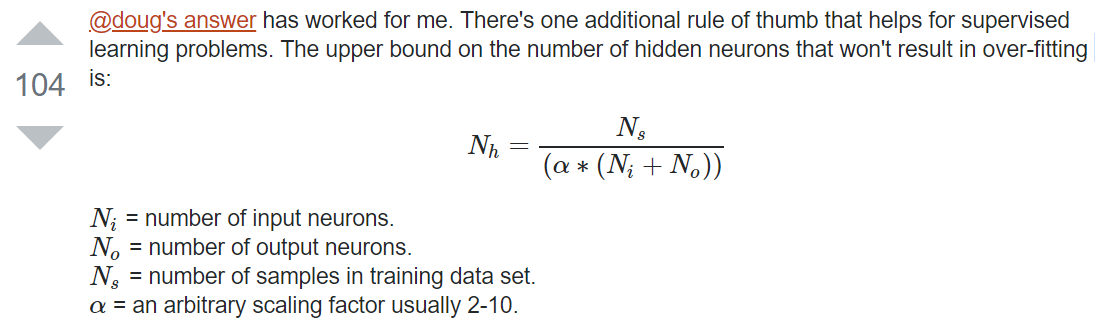

In [71]:
theta1 = np.zeros((7,14))
theta2 = np.zeros((4,8))
theta3 = np.zeros((1,5))
Thetas = [theta1, theta2, theta3]

(11, 14)
(1, 12)


In [ ]:
# @param X : passed in as an unrolled vector
def reshape(X, m, n):
    return np.array(X.reshape(m,n))

def flatten(X):
    return np.array(X.flatten()).reshape((X.shape[0],X.shape[1]),1)

def flattenThetas(theta1,theta2,theta3):
    return np.r_[theta1.ravel(),theta2.ravel(),theta3.ravel()]

def flattenParams(Ds):
    inputLayerSize = 13
    hiddenLayerSize1 = 7
    hiddenLayerSize2 = 4
    outputLayerSize = 1
    """
    Hand this function a list of theta matrices, and it will flatten it
    into one long (n,1) shaped numpy array
    """
    flattenedDs = [ Ds.flatten() for curD in Ds ]
    combined = list(itertools.chain.from_iterable(flattenedDs))
    assert len(combined) == (inputLayerSize + 1) * hiddenLayerSize1 + \
                            (hiddenLayerSize + 1) * hiddenLayerSize2 + \
                            (hiddenLayerSize2 + 1) * outputLayerSize
                        
    return np.array(combined).reshape((len(combined),1))

def sigmoid(X, theta):
    return expit(np.dot(X,theta))
  



